#SMOTERegression DataFrame 불러오기


In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
seoul=pd.read_csv('/content/drive/MyDrive/웨더고프로젝트/ver1(210717)/seoul.csv')
b_GyeongBokGung=pd.read_csv('/content/drive/MyDrive/경복궁.csv')
b_NationalMuseumOfKorea=pd.read_csv('/content/drive/MyDrive/국립중앙박물관.csv')
b_NamSanGolHanOkVillage=pd.read_csv('/content/drive/MyDrive/남산골한옥마을.csv')
b_DuckSooGung=pd.read_csv('/content/drive/MyDrive/덕수궁.csv')
b_SeoDaeMunNaturalHistoryMuseum=pd.read_csv('/content/drive/MyDrive/서대문자연사박물관.csv')
b_SeoDaeMunPrisonHistoryMuseum=pd.read_csv('/content/drive/MyDrive/서대문형무소역사관.csv')
b_SeoulMuseumOfArt=pd.read_csv('/content/drive/MyDrive/서울시립미술관.csv')
b_SunReungJungReung=pd.read_csv('/content/drive/MyDrive/선릉정릉.csv')
b_JongMyo=pd.read_csv('/content/drive/MyDrive/종묘.csv')
b_ChangGyeongGung=pd.read_csv('/content/drive/MyDrive/창경궁.csv')
b_ChangDeokGung=pd.read_csv('/content/drive/MyDrive/창덕궁.csv')
b_TaeReungGangNeung=pd.read_csv('/content/drive/MyDrive/태릉강릉조선왕릉전시관.csv')
b_TrickEyeMuseum=pd.read_csv('/content/drive/MyDrive/트릭아이미술관.csv')
b_HeonLeungInReung=pd.read_csv('/content/drive/MyDrive/헌릉인릉.csv')

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
!pip install catboost

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso, ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error , r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import xgboost
import lightgbm
import scipy
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
import catboost

In [5]:
# 원래는 기온, 습도으로 해주어야 하나, 여기서는 평균 기온과 평균 습도로 열지수의 평균을 구해주도록 하겠다.
seoul['열지수']=0
i=0

for i in range(0,108):
    Tc=seoul.loc[i, '평균 기온(°C)']
    T=(Tc*1.8)+32
    R=seoul.loc[i, '평균 상대습도(%)']*1/100
    
    h1= -42.379
    h2=2.04901523*T
    h3=10.14333127*R
    h4=-0.22475541*T*R
    h5=-6.83783*(pow(10, -3))*((pow(T, 2)))
    h6=-5.481717*(pow(10, -2))*(pow(R, 2))
    h7=1.22874*(pow(10,-3))*T*R
    h8=8.5282*(pow(10, -4))*T*(pow(R, 2))
    h9=-1.99*(pow(10, -6))*(pow(T, 2))*(pow(R, 2))
    
    Heat_index=h1+h2+h3+h4+h5+h6+h7+h8+h9
    
    seoul['열지수'][i]=Heat_index
    i+=1

In [6]:
b_GyeongBokGung=b_GyeongBokGung.iloc[:, 1:]
b_NationalMuseumOfKorea=b_NationalMuseumOfKorea.iloc[:, 1:]
b_NamSanGolHanOkVillage=b_NamSanGolHanOkVillage.iloc[:, 1:]
b_DuckSooGung=b_DuckSooGung.iloc[:, 1:]
b_SeoDaeMunNaturalHistoryMuseum=b_SeoDaeMunNaturalHistoryMuseum.iloc[:, 1:]
b_SeoDaeMunPrisonHistoryMuseum=b_SeoDaeMunPrisonHistoryMuseum.iloc[:, 1:]
b_SeoulMuseumOfArt=b_SeoulMuseumOfArt.iloc[:, 1:]
b_SunReungJungReung=b_SunReungJungReung.iloc[:, 1:]
b_JongMyo=b_JongMyo.iloc[:, 1:]
b_ChangGyeongGung=b_ChangGyeongGung.iloc[:, 1:]
b_ChangDeokGung=b_ChangDeokGung.iloc[:, 1:]
b_TaeReungGangNeung=b_TaeReungGangNeung.iloc[:, 1:]
b_TrickEyeMuseum=b_TrickEyeMuseum.iloc[:, 1:]
b_HeonLeungInReung=b_HeonLeungInReung.iloc[:, 1:]

2018-2019년 관광지별 관광객수 보기
--

In [12]:
time_series=pd.DataFrame(columns=['date','GyeongBokGung','NationalMuseumOfKorea',
                                  'NamSanGolHanOkVillage','DuckSooGung',
                                  'SeoDaeMunNaturalHistoryMuseum',
                                  'SeoDaeMunPrisonHistoryMuseum',
                                  'SeoulMuseumOfArt',
                                  'SunReungJungReung',
                                  'JongMyo', 'ChangGyeongGung',
                                  'ChangDeokGung','TaeReungGangNeung',
                                  'TrickEyeMuseum','HeonLeungInReung'])

In [13]:
time_series['date']=seoul['date']
time_series['GyeongBokGung']=b_GyeongBokGung['경복궁']
time_series['NationalMuseumOfKorea']=b_NationalMuseumOfKorea['국립중앙박물관']
time_series['NamSanGolHanOkVillage']=b_NamSanGolHanOkVillage['남산골한옥마을']
time_series['DuckSooGung']=b_DuckSooGung['덕수궁']
time_series['SeoDaeMunNaturalHistoryMuseum']=b_SeoDaeMunNaturalHistoryMuseum['서대문자연사박물관']
time_series['SeoDaeMunPrisonHistoryMuseum']=b_SeoDaeMunPrisonHistoryMuseum['서대문형무소역사관']
time_series['SeoulMuseumOfArt']=b_SeoulMuseumOfArt['서울시립미술관 본관']
time_series['SunReungJungReung']=b_SunReungJungReung['선릉·정릉']
time_series['TaeReungGangNeung']=b_TaeReungGangNeung['태릉 ·  강릉 · 조선왕릉전시관']
time_series['TrickEyeMuseum']=b_TrickEyeMuseum['트릭아이미술관']
time_series['ChangDeokGung']=b_ChangDeokGung['창덕궁']
time_series['ChangGyeongGung']=b_ChangGyeongGung['창경궁']
time_series['HeonLeungInReung']=b_HeonLeungInReung['헌릉ㆍ인릉']
time_series['JongMyo']=b_JongMyo['종묘']

In [14]:
time_series.isna().sum()

date                             0
GyeongBokGung                    0
NationalMuseumOfKorea            0
NamSanGolHanOkVillage            0
DuckSooGung                      0
SeoDaeMunNaturalHistoryMuseum    0
SeoDaeMunPrisonHistoryMuseum     0
SeoulMuseumOfArt                 0
SunReungJungReung                0
JongMyo                          0
ChangGyeongGung                  0
ChangDeokGung                    0
TaeReungGangNeung                0
TrickEyeMuseum                   0
HeonLeungInReung                 0
dtype: int64

In [16]:
time_series=time_series.set_index('date')

In [18]:
time_series=time_series.transpose()

In [19]:
time_series

date,201101,201102,201103,201104,201105,201106,201107,201108,201109,201110,201111,201112,201201,201202,201203,201204,201205,201206,201207,201208,201209,201210,201211,201212,201301,201302,201303,201304,201305,201306,201307,201308,201309,201310,201311,201312,201401,201402,201403,201404,...,201609,201610,201611,201612,201701,201702,201703,201704,201705,201706,201707,201708,201709,201710,201711,201712,201801,201802,201803,201804,201805,201806,201807,201808,201809,201810,201811,201812,201901,201902,201903,201904,201905,201906,201907,201908,201909,201910,201911,201912
GyeongBokGung,141183.0,230814.0,228276.0,349368.0,438567.0,252185.0,275074.0,386264.0,437683.0,518742.0,304318.0,237330.0,114505.0,169684.0,233028.0,336255.0,481103.0,224854.0,193169.0,202572.0,296957.0,520733.0,192476.0,133012.0,105724.0,140253.0,179912.0,276043.0,522279.0,208081.0,203073.0,255664.0,319869.0,385056.0,211840.0,145544.0,169707.0,154435.0,223788.0,360411.0,...,360920.0,512873.0,194951.0,151317.0,165237.0,155014.0,165143.0,351637.0,355030.0,175296.0,184033.0,236717.0,308138.0,850481.0,225334.0,164611.0,124211.0,197756.0,220494.0,341280.0,407217.0,279530.0,200582.0,198930.0,528333.0,434708.0,290439.0,201767.0,169113.0,263784.0,233317.0,387075.0,449268.0,321317.0,264643.0,260658.0,494024.0,464290.0,327614.0,239734.0
NationalMuseumOfKorea,260272.0,224691.0,184565.0,240861.0,307969.0,214570.0,331836.0,554395.0,223776.0,263728.0,199058.0,233828.0,229035.0,161943.0,154580.0,215851.0,306757.0,230204.0,277935.0,434529.0,219211.0,265513.0,231618.0,227077.0,233169.0,192802.0,196436.0,226614.0,296370.0,183498.0,238909.0,365305.0,226526.0,265316.0,192502.0,286992.0,333749.0,243843.0,172398.0,196802.0,...,242191.0,262585.0,190929.0,298297.0,456498.0,344705.0,229109.0,235668.0,260195.0,209942.0,287348.0,417934.0,190075.0,268676.0,222719.0,242135.0,279500.0,250174.0,157178.0,152146.0,300711.0,202170.0,295363.0,494328.0,267912.0,325753.0,194097.0,258904.0,295344.0,290328.0,165737.0,164391.0,307561.0,197532.0,317321.0,478483.0,244301.0,289342.0,197011.0,268274.0
NamSanGolHanOkVillage,72313.0,135771.0,105735.0,176991.0,188983.0,164051.0,132893.0,162527.0,217701.0,204315.0,145349.0,110986.0,105489.0,98477.0,115029.0,215338.0,219653.0,182033.0,156705.0,156150.0,174729.0,206433.0,122411.0,90038.0,70114.0,116963.0,108698.0,167888.0,168253.0,148428.0,136642.0,160728.0,219029.0,183079.0,126488.0,146828.0,46672.0,50651.0,172551.0,126086.0,...,95258.0,114247.0,61868.0,43800.0,44580.0,52138.0,59487.0,97634.0,91142.0,68128.0,50425.0,82899.0,140707.0,179913.0,89956.0,63438.0,50485.0,73675.0,98111.0,137384.0,147457.0,107161.0,59624.0,57435.0,188897.0,169039.0,108672.0,70399.0,64666.0,84249.0,91944.0,156504.0,155493.0,117601.0,75664.0,73788.0,142530.0,163316.0,125777.0,68460.0
DuckSooGung,92135.0,132920.0,64869.0,85548.0,103100.0,81489.0,81544.0,116552.0,128343.0,137870.0,107467.0,52140.0,40041.0,36900.0,40244.0,66246.0,89515.0,69169.0,43076.0,45103.0,49013.0,143940.0,97241.0,44855.0,46980.0,46825.0,77718.0,96402.0,103001.0,63520.0,48941.0,65233.0,97658.0,123934.0,166366.0,99301.0,111450.0,93247.0,144903.0,86252.0,...,172717.0,150871.0,101022.0,52797.0,69402.0,67840.0,68205.0,120740.0,144608.0,87020.0,65982.0,76731.0,133620.0,493927.0,121730.0,72244.0,64456.0,71009.0,100321.0,110981.0,161723.0,96296.0,62863.0,69297.0,184077.0,179495.0,141650.0,129213.0,109930.0,123757.0,143929.0,199321.0,246336.0,170424.0,104458.0,149905.0,181790.0,280107.0,222529.0,112314.0
SeoDaeMunNaturalHistoryMuseum,34551.0,20934.0,18641.0,24078.0,25593.0,25607.0,29552.0,45851.0,18775.0,27909.0,27599.0,19308.0,29042.0,18713.0,30889.0,30026.0,23186.0,33053.0,31982.0,43775.0,21241.0,25009.0,31214.0,18881.0,24092.0,13630.0,18866.0,26787.0,21395.0,32152.0,31296.0,48459.0,23766.0,24073.0,33703.0,23245.0,38632.0,24261.0,29177.0,24761.0,...,22388.0,26965.0,24905.0,20579.0,29396.0,28301.0,23068.0,26021.0,27236.0,26453.0,31237.0,49720.0,0.0,33587.0,28265.0,25143.0,35006.0,29033.0,30069.0,29995.0,30406.0,28354.0,28941.0,501

2018년 월별 관광객수

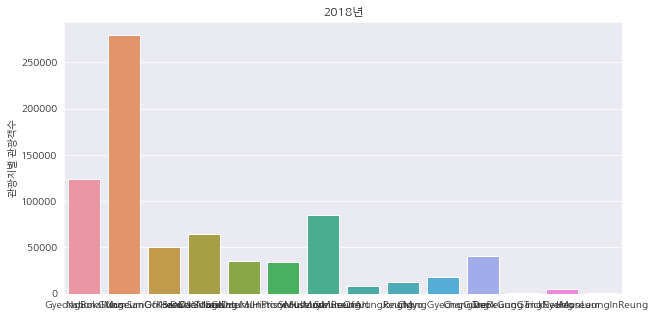

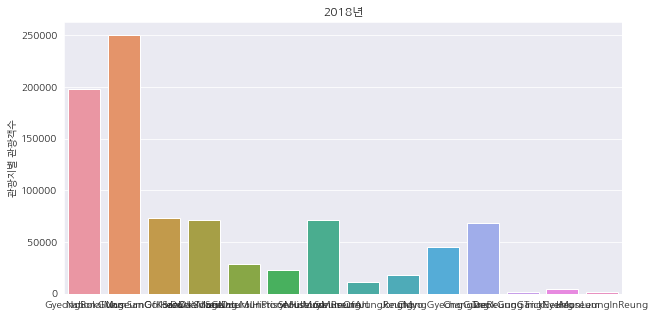

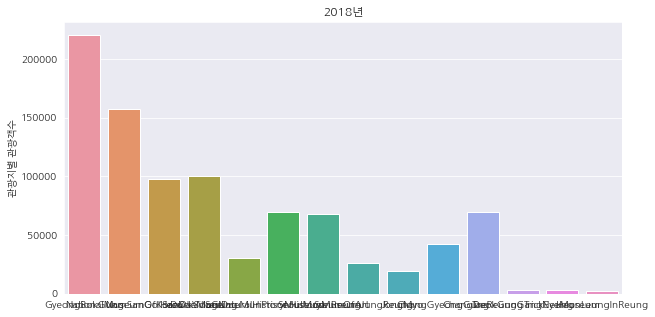

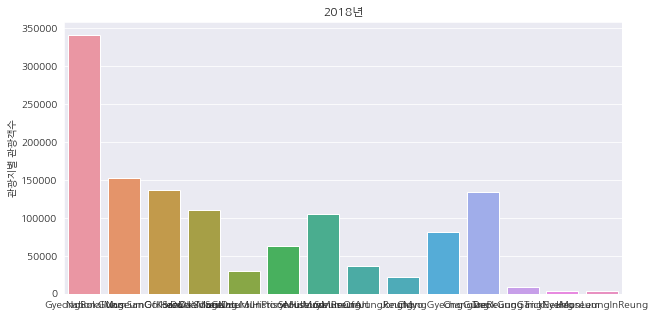

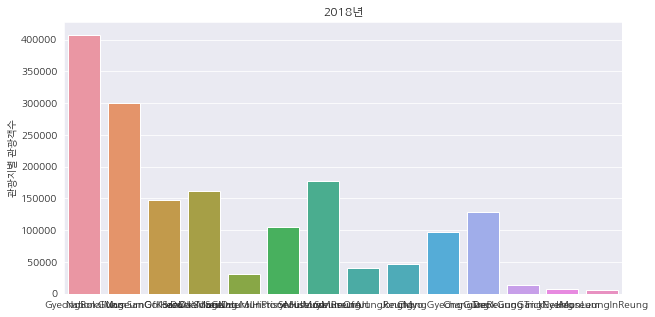

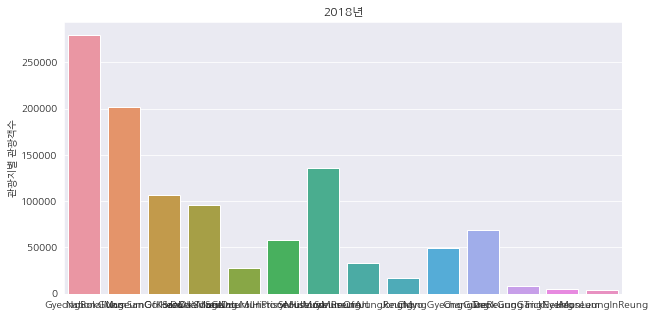

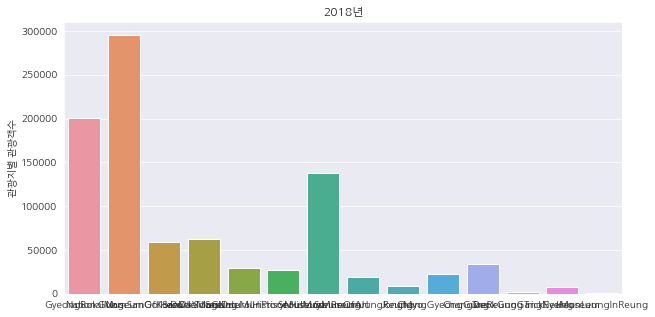

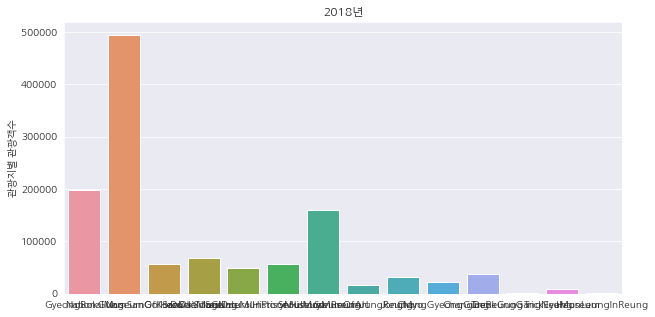

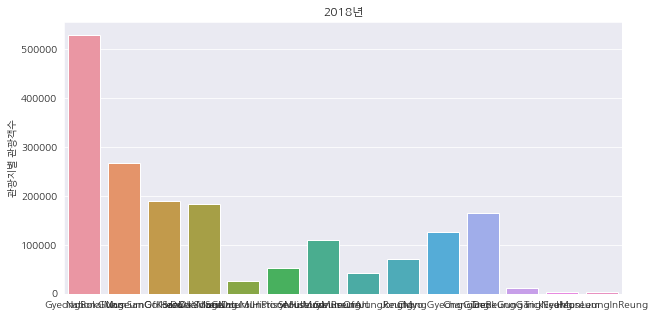

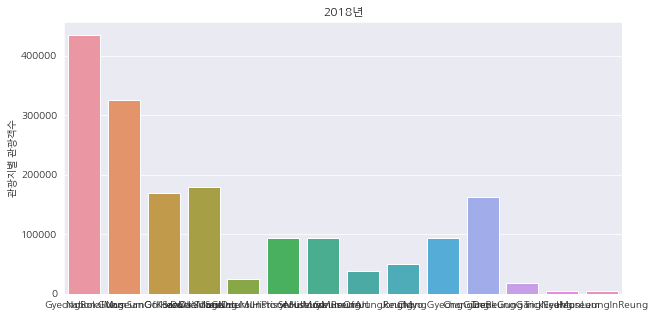

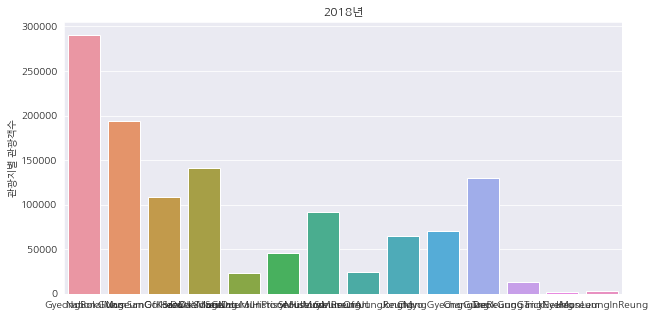

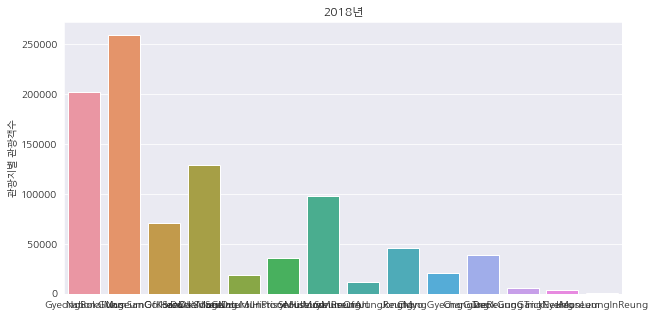

In [36]:
for i in range(84,96):
    plt.rcParams['font.family'] = 'NanumGothic' 
    figure, (ax1) = plt.subplots(nrows=1, ncols=1)
    figure.set_size_inches(10,5)
    sns.barplot(data=time_series, x=time_series.index, y=time_series.iloc[:, i])
    sns.set_style('darkgrid')
    ax1.set(ylabel="관광지별 관광객수", title="2018년")
    plt.show()

2019년 월별 관광객수


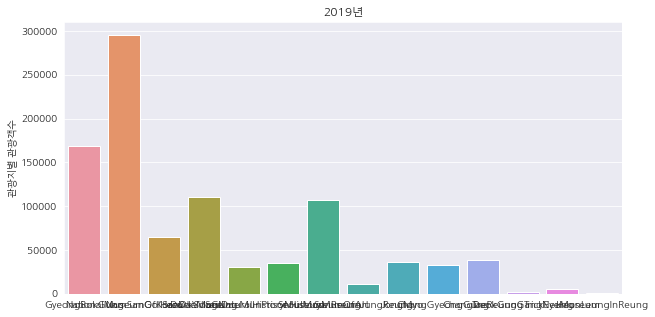

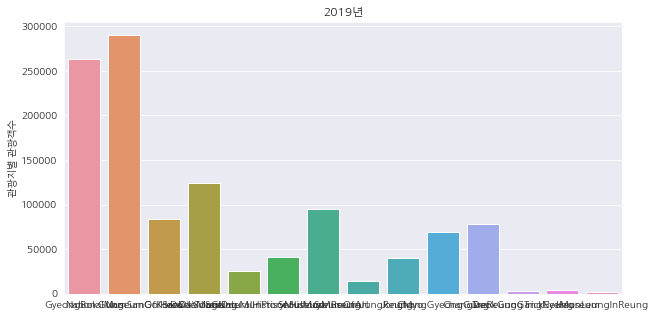

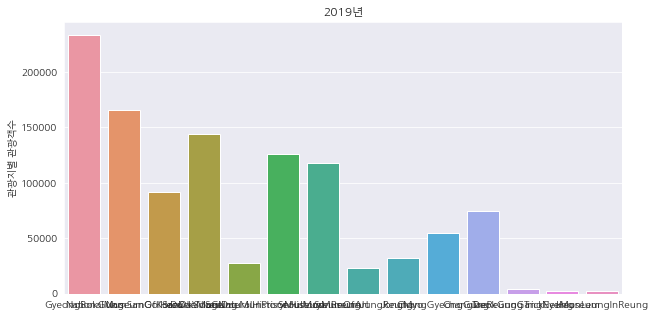

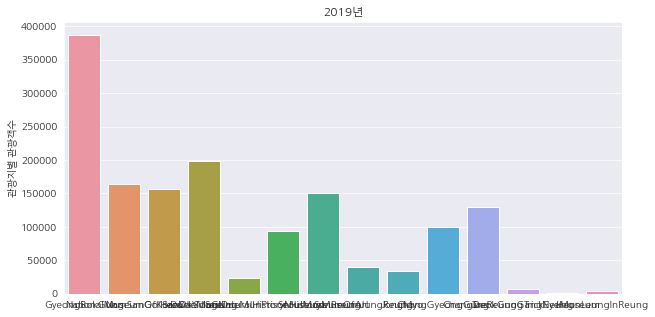

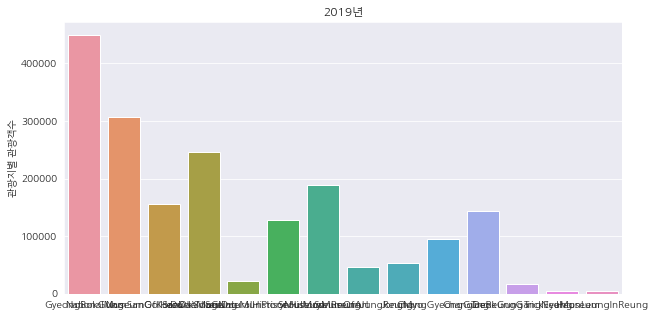

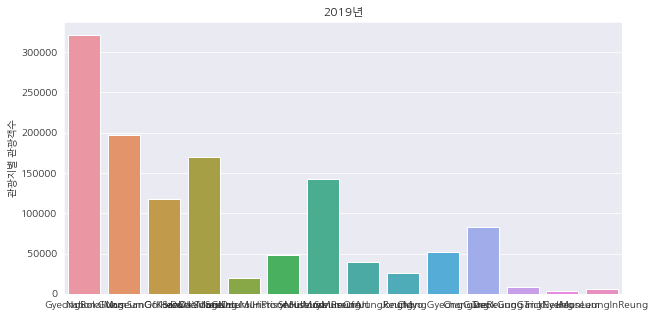

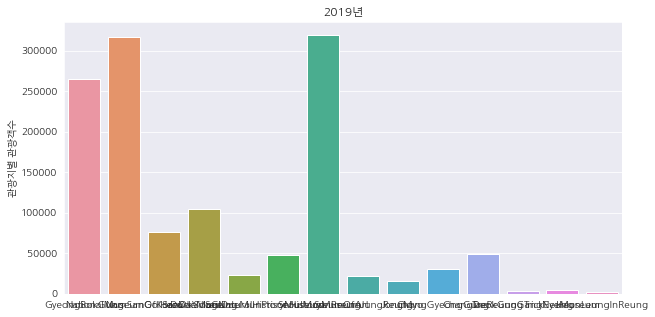

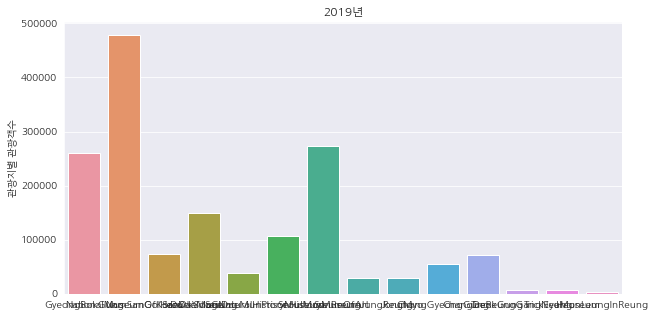

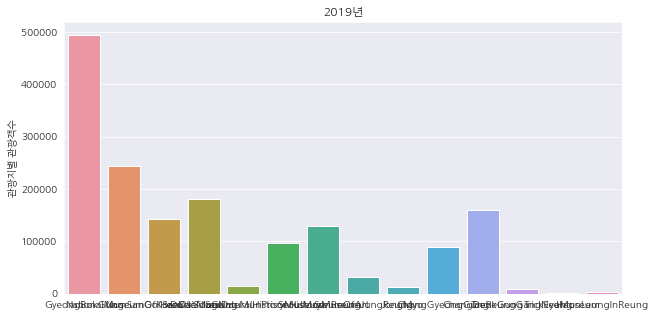

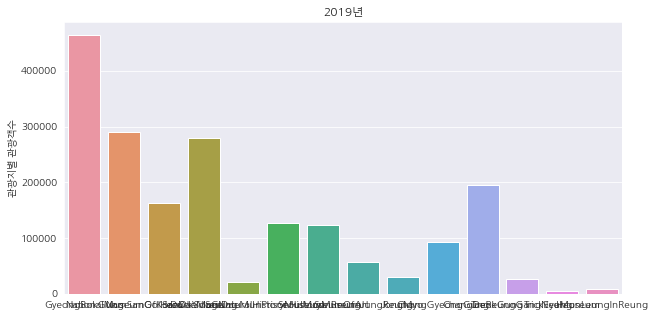

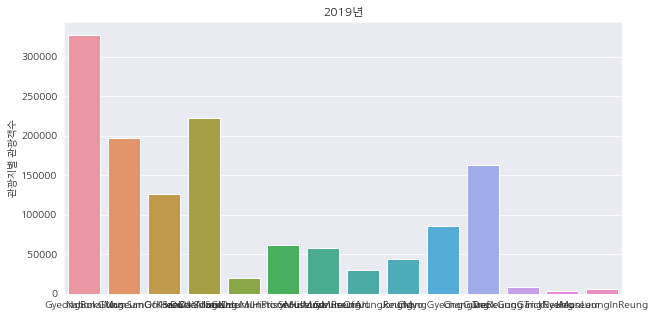

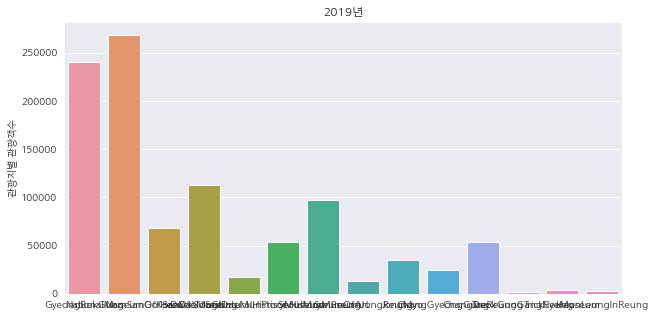

In [34]:
for i in range(96,108):
    plt.rcParams['font.family'] = 'NanumGothic' 
    figure, (ax1) = plt.subplots(nrows=1, ncols=1)
    figure.set_size_inches(10,5)
    sns.barplot(data=time_series, x=time_series.index, y=time_series.iloc[:, i])
    sns.set_style('darkgrid')
    ax1.set(ylabel="관광지별 관광객수", title="2019년")
    plt.show()

#SMOTE Regression before

In [99]:
class regression_select:
    def linear(x_train,y_train, x_test, y_test):
        lr=LinearRegression()
        lr.fit(x_train, y_train)
        y_pred=lr.predict(x_test)
        train_score=lr.score(x_train, y_train)
        test_score=lr.score(x_test, y_test)
        mse=mean_squared_error(y_test, y_pred)
        rmse=np.sqrt(mse)
        return rmse, train_score, test_score

    def ridge(x_train,y_train, x_test, y_test):
        ridge = Ridge()
        ridge.fit(x_train, y_train)
        y_pred=ridge.predict(x_test)
        train_score=ridge.score(x_train, y_train)
        test_score=ridge.score(x_test, y_test)
        mse=mean_squared_error(y_test, y_pred)
        rmse=np.sqrt(mse)
        return rmse, train_score, test_score

    def lasso(x_train,y_train, x_test, y_test):
        lasso = Lasso()
        lasso.fit(x_train, y_train)
        y_pred=lasso.predict(x_test)
        train_score=lasso.score(x_train, y_train)
        test_score=lasso.score(x_test, y_test)
        mse=mean_squared_error(y_test, y_pred)
        rmse=np.sqrt(mse)
        return rmse, train_score, test_score

    def elasticnet(x_train,y_train, x_test, y_test):
        en = ElasticNet()
        en.fit(x_train, y_train)
        y_pred=en.predict(x_test)
        train_score=en.score(x_train, y_train)
        test_score=en.score(x_test, y_test)
        mse=mean_squared_error(y_test, y_pred)
        rmse=np.sqrt(mse)
        return rmse, train_score, test_score

    def xgboost(x_train,y_train, x_test, y_test):
        xgb = xgboost.XGBRegressor(random_state=42)
        xgb.fit(x_train, y_train)
        y_pred=xgb.predict(x_test)
        train_score=xgb.score(x_train, y_train)
        test_score=xgb.score(x_test, y_test)
        mse=mean_squared_error(y_test, y_pred)
        rmse=np.sqrt(mse)
        return rmse, train_score, test_score

    def lgbm(x_train,y_train, x_test, y_test):
         lgbm = lightgbm.LGBMRegressor(random_state=42)
         lgbm.fit(x_train, y_train)
         y_pred=lgbm.predict(x_test)
         train_score=lgbm.score(x_train, y_train)
         test_score=lgbm.score(x_test, y_test)
         mse=mean_squared_error(y_test, y_pred)
         rmse=np.sqrt(mse)
         return rmse, train_score, test_score

    def catboost(x_train,y_train, x_test, y_test):
         cb = catboost.CatBoostRegressor(random_state=42)
         cb.fit(x_train, y_train)
         y_pred=cb.predict(x_test)
         train_score=cb.score(x_train, y_train)
         test_score=cb.score(x_test, y_test)
         mse=mean_squared_error(y_test, y_pred)
         rmse=np.sqrt(mse)
         return rmse, train_score, test_score

In [100]:
class regression_model:
    def model_choice(x_train,y_train, x_test, y_test):
        model=pd.DataFrame(columns=['모델','rmse','train_score','test_score'])
        linear_rmse=regression_select.linear(x_train,y_train, x_test, y_test)[0]
        linear_train_score=regression_select.linear(x_train,y_train, x_test, y_test)[1]
        linear_test_score=regression_select.linear(x_train,y_train, x_test, y_test)[2]

        model=model.append({'모델':'linear', 'rmse':linear_rmse,
                            'train_score':linear_train_score,
                            'test_score':linear_test_score}, ignore_index=True)
    

        ridge_rmse=regression_select.ridge(x_train,y_train, x_test, y_test)[0]
        ridge_train_score=regression_select.ridge(x_train,y_train, x_test, y_test)[1]
        ridge_test_score=regression_select.ridge(x_train,y_train, x_test, y_test)[2]

        model=model.append({'모델':'ridge', 'rmse':ridge_rmse,
                            'train_score':ridge_train_score,
                            'test_score':ridge_test_score}, ignore_index=True)
        

        lasso_rmse=regression_select.lasso(x_train,y_train, x_test, y_test)[0]
        lasso_train_score=regression_select.lasso(x_train,y_train, x_test, y_test)[1]
        lasso_test_score=regression_select.lasso(x_train,y_train, x_test, y_test)[2]

        model=model.append({'모델':'lasso', 'rmse':lasso_rmse,
                            'train_score':lasso_train_score,
                            'test_score':lasso_test_score}, ignore_index=True)
        

        elasticnet_rmse=regression_select.elasticnet(x_train,y_train, x_test, y_test)[0]
        elasticnet_train_score=regression_select.elasticnet(x_train,y_train, x_test, y_test)[1]
        elasticnet_test_score=regression_select.elasticnet(x_train,y_train, x_test, y_test)[2]

        model=model.append({'모델':'elasticnet', 'rmse':elasticnet_rmse,
                            'train_score':elasticnet_train_score,
                            'test_score':elasticnet_test_score}, ignore_index=True)
        

        xgboost_rmse=regression_select.xgboost(x_train,y_train, x_test, y_test)[0]
        xgboost_train_score=regression_select.xgboost(x_train,y_train, x_test, y_test)[1]
        xgboost_test_score=regression_select.xgboost(x_train,y_train, x_test, y_test)[2]

        model=model.append({'모델':'xgboost', 'rmse':xgboost_rmse,
                            'train_score':xgboost_train_score,
                            'test_score':xgboost_test_score}, ignore_index=True)
        

        lgbm_rmse=regression_select.lgbm(x_train,y_train, x_test, y_test)[0]
        lgbm_train_score=regression_select.lgbm(x_train,y_train, x_test, y_test)[1]
        lgbm_test_score=regression_select.lgbm(x_train,y_train, x_test, y_test)[2]

        model=model.append({'모델':'lightgbm', 'rmse':lgbm_rmse,
                            'train_score':lgbm_train_score,
                            'test_score':lgbm_test_score}, ignore_index=True)
        

        catboost_rmse=regression_select.catboost(x_train,y_train, x_test, y_test)[0]
        catboost_train_score=regression_select.catboost(x_train,y_train, x_test, y_test)[1]
        catboost_test_score=regression_select.catboost(x_train,y_train, x_test, y_test)[2]

        model=model.append({'모델':'catboost', 'rmse':catboost_rmse,
                            'train_score':catboost_train_score,
                            'test_score':catboost_test_score}, ignore_index=True)
              
        model=model.sort_values('test_score', ascending=False)

        return model

In [101]:
def model_list(df):
    df=df
    x_train=df.iloc[:-24, 2:-1]
    y_train=df.iloc[:-24, -1:]
    x_test=df.iloc[-24:, 2:-1]
    y_test=df.iloc[-24:, -1:]
    model_choice=regression_model.model_choice(x_train, y_train, x_test, y_test)
    return model_choice

GyeongBokGung
--

In [ ]:
result1=model_list(b_GyeongBokGung)

In [103]:
result1

,모델,rmse,train_score,test_score
5,lightgbm,86704.517894,0.867801,0.369227
3,elasticnet,100628.075872,0.537855,0.150373
2,lasso,106735.968598,0.586133,0.044102
1,ridge,114835.020179,0.603696,-0.106467
0,linear,127244.470681,0.612704,-0.358525
4,xgboost,199989.890775,0.995324,-2.355877
6,catboost,73010.091925,-166.378002,-37.006677


NationalMuseumOfKorea
--

In [ ]:
result2=model_list(b_NationalMuseumOfKorea)

In [105]:
result2

,모델,rmse,train_score,test_score
4,xgboost,60615.180914,0.990140,0.493538
5,lightgbm,69544.283322,0.671994,0.333336
2,lasso,76734.691794,0.389352,0.188353
3,elasticnet,77176.285399,0.367828,0.178984
1,ridge,78008.741336,0.394247,0.161177
0,linear,78908.013980,0.395228,0.141726
6,catboost,58945.689010,-164.371876,-29.382682


NamSanGolHanOkVillage
--

In [ ]:
result3=model_list(b_NamSanGolHanOkVillage)

In [107]:
result3

,모델,rmse,train_score,test_score
4,xgboost,24444.612694,0.992310,0.635403
5,lightgbm,29027.544055,0.769033,0.485876
1,ridge,37107.974153,0.546633,0.159802
3,elasticnet,37203.868751,0.406460,0.155454
0,linear,37949.646657,0.549626,0.121256
2,lasso,38089.636692,0.535280,0.114761
6,catboost,24285.320356,-165.091178,-35.917709


DuckSooGung
--

In [ ]:
result4=model_list(b_DuckSooGung)

In [109]:
result4

,모델,rmse,train_score,test_score
5,lightgbm,53348.664580,0.558478,0.112392
2,lasso,64414.728562,0.429601,-0.294031
1,ridge,64637.317208,0.434617,-0.302989
0,linear,65001.139429,0.436721,-0.317699
3,elasticnet,66738.254809,0.365555,-0.389069
4,xgboost,170645.291638,0.981684,-8.081609
6,catboost,63173.997912,-164.348108,-36.818531


SeoDaeMunNaturalHistoryMuseum
--

In [ ]:
result5=model_list(b_SeoDaeMunNaturalHistoryMuseum)

In [111]:
result5

,모델,rmse,train_score,test_score
4,xgboost,5493.742977,0.985651,0.418607
5,lightgbm,5967.657236,0.720085,0.313973
1,ridge,7711.535575,0.292330,-0.145553
0,linear,7837.549822,0.294250,-0.183298
2,lasso,7904.368659,0.288269,-0.203560
3,elasticnet,7968.521128,0.263067,-0.223176
6,catboost,4786.904096,-163.771443,-34.412908


SeoDaeMunPrisonHistoryMuseum
--

In [ ]:
result6=model_list(b_SeoDaeMunPrisonHistoryMuseum)

In [113]:
result6

,모델,rmse,train_score,test_score
5,lightgbm,33747.739349,0.649630,-0.092149
4,xgboost,34243.991913,0.982652,-0.124505
3,elasticnet,39911.897936,0.480869,-0.527557
1,ridge,42779.911471,0.495952,-0.754981
2,lasso,43277.061898,0.496121,-0.796007
0,linear,43277.362847,0.496142,-0.796032
6,catboost,34191.551105,-164.600884,-34.547529


SeoulMuseumOfArt
--

In [ ]:
result7=model_list(b_SeoulMuseumOfArt)

In [115]:
result7

,모델,rmse,train_score,test_score
2,lasso,57224.444246,0.327207,0.088667
0,linear,58597.330345,0.330423,0.044414
1,ridge,59565.859220,0.323410,0.012564
4,xgboost,60495.907631,0.965370,-0.018511
5,lightgbm,60666.499827,0.534334,-0.024264
3,elasticnet,66629.883612,0.189399,-0.235526
6,catboost,56652.314575,-162.323443,-29.994178


SunReungJungReung
--

In [ ]:
result8=model_list(b_SunReungJungReung)

In [117]:
result8

,모델,rmse,train_score,test_score
5,lightgbm,6258.554541,0.847898,0.762441
4,xgboost,7821.404588,0.993156,0.628984
1,ridge,8154.514376,0.567816,0.596708
2,lasso,8180.010166,0.563022,0.594183
3,elasticnet,8210.123747,0.535110,0.591189
0,linear,8223.959284,0.568956,0.589810
6,catboost,7147.992955,-165.056279,-42.858906


JongMyo
--

In [ ]:
result9=model_list(b_JongMyo)

In [119]:
result9

,모델,rmse,train_score,test_score
4,xgboost,16049.152177,0.987862,0.021504
3,elasticnet,18082.648974,0.275727,-0.242164
1,ridge,18174.248257,0.321493,-0.254780
2,lasso,18336.723050,0.306999,-0.277316
0,linear,18420.534732,0.330013,-0.289019
5,lightgbm,19462.536192,0.794857,-0.438977
6,catboost,16491.971771,-164.855974,-37.243806


ChangGyeongGung
--

In [ ]:
result10=model_list(b_ChangGyeongGung)

In [121]:
result10

,모델,rmse,train_score,test_score
5,lightgbm,25100.310479,0.841961,0.339062
1,ridge,29148.214606,0.560569,0.108695
2,lasso,29379.114694,0.554756,0.094517
3,elasticnet,29780.437384,0.467498,0.069610
0,linear,30457.469753,0.572147,0.026826
4,xgboost,51678.722752,0.993939,-1.801730
6,catboost,26053.574814,-165.604747,-47.884571


ChangDeokGung
--

In [ ]:
result11=model_list(b_ChangDeokGung)

In [123]:
result11

,모델,rmse,train_score,test_score
5,lightgbm,32468.658940,0.824518,0.572935
2,lasso,38909.937887,0.522375,0.386681
1,ridge,38948.961072,0.532397,0.385450
0,linear,39180.557681,0.537389,0.378120
3,elasticnet,40337.610967,0.415972,0.340848
4,xgboost,103389.149969,0.992577,-3.330273
6,catboost,45642.650469,-166.221594,-45.519025


TaeReungGangNeung
--

In [ ]:
result12=model_list(b_TaeReungGangNeung)

In [93]:
result12

,모델,rmse,train_score,test_score
4,xgboost,3461.926813,0.996474,0.693613
5,lightgbm,3657.445388,0.819327,0.658028
3,elasticnet,4372.583238,0.556095,0.511222
2,lasso,4457.405317,0.589285,0.492075
1,ridge,4534.067034,0.603828,0.474454
0,linear,4871.348052,0.610196,0.393357
6,catboost,3328.186023,-165.668706,-34.786285


TrickEyeMuseum
--

In [ ]:
result13=model_list(b_TrickEyeMuseum)

In [125]:
result13

,모델,rmse,train_score,test_score
2,lasso,5112.052974,0.381304,-6.888562
5,lightgbm,5268.658130,0.489186,-7.379290
1,ridge,5389.623368,0.391900,-7.768474
0,linear,5629.783853,0.394598,-8.567327
3,elasticnet,6337.434079,0.260950,-11.123669
4,xgboost,8801.659783,0.992473,-22.384944
6,catboost,7198.517721,-165.442169,-499.826610


HeonLeungInReung
--

In [ ]:
result14=model_list(b_HeonLeungInReung)

In [127]:
result14

,모델,rmse,train_score,test_score
5,lightgbm,1126.949287,0.907393,0.663987
4,xgboost,1146.913328,0.996424,0.651976
1,ridge,1413.722555,0.754622,0.471219
0,linear,1421.694244,0.759073,0.465238
2,lasso,1438.667672,0.743565,0.452393
3,elasticnet,1452.910602,0.680721,0.441497
6,catboost,1135.356695,-165.896021,-35.935721


#SMOTE Regression

In [39]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# import visualization
import matplotlib.pyplot as plt

# import machine learning
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer

In [38]:
def get_synth_cases(D, target, o=200, k=3, categorical_col = []):
    '''
    Function to generate the new cases.
    INPUT:
        D - pd.DataFrame with the initial data
        target - string name of the target column in the dataset
        o - oversampling rate
        k - number of nearest neighbors to use for the generation
        categorical_col - list of categorical column names
    OUTPUT:
        new_cases - pd.DataFrame containing new generated cases
    '''
    new_cases = pd.DataFrame(columns = D.columns) # initialize the list of new cases 
    ng = o // 100 # the number of new cases to generate
    for index, case in D.iterrows():
        # find k nearest neighbors of the case
        knn = KNeighborsRegressor(n_neighbors = k+1) # k+1 because the case is the nearest neighbor to itself
        knn.fit(D.drop(columns = [target]).values, D[[target]])
        neighbors = knn.kneighbors(case.drop(labels = [target]).values.reshape(1, -1), return_distance=False).reshape(-1)
        neighbors = np.delete(neighbors, np.where(neighbors == index))
        for i in range(0, ng):
            # randomly choose one of the neighbors
            x = D.iloc[neighbors[np.random.randint(k)]]
            attr = {}          
            for a in D.columns:
                # skip target column
                if a == target:
                    continue;
                if a in categorical_col:
                    # if categorical then choose randomly one of values
                    if np.random.randint(2) == 0:
                        attr[a] = case[a]
                    else:
                        attr[a] = x[a]
                else:
                    # if continious column
                    diff = case[a] - x[a]
                    attr[a] = case[a] + np.random.randint(2) * diff
            # decide the target column
            new = np.array(list(attr.values()))
            d1 = cosine_similarity(new.reshape(1, -1), case.drop(labels = [target]).values.reshape(1, -1))[0][0]
            d2 = cosine_similarity(new.reshape(1, -1), x.drop(labels = [target]).values.reshape(1, -1))[0][0]
            attr[target] = (d2 * case[target] + d1 * x[target]) / (d1 + d2)
            
            # append the result
            new_cases = new_cases.append(attr,ignore_index = True)
                    
    return new_cases

def SmoteR(D, target, th = 0.999, o = 200, u = 100, k = 3, categorical_col = []):
    '''
    The implementation of SmoteR algorithm:
    https://core.ac.uk/download/pdf/29202178.pdf
    INPUT:
        D - pd.DataFrame - the initial dataset
        target - the name of the target column in the dataset
        th - relevance threshold
        o - oversampling rate
        u - undersampling rate
        k - the number of nearest neighbors
    OUTPUT:
        new_D - the resulting new dataset
    '''
    # median of the target variable
    y_bar = D[target].median()
    
    # find rare cases where target less than median
    rareL = D[(relevance(D[target]) > th) & (D[target] > y_bar)]  
    # generate rare cases for rareL
    new_casesL = get_synth_cases(rareL, target, o, k , categorical_col)
    
    # find rare cases where target greater than median
    rareH = D[(relevance(D[target]) > th) & (D[target] < y_bar)]
    # generate rare cases for rareH
    new_casesH = get_synth_cases(rareH, target, o, k , categorical_col)
    
    new_cases = pd.concat([new_casesL, new_casesH], axis=0)
    
    # undersample norm cases
    norm_cases = D[relevance(D[target]) <= th]
    # get the number of norm cases
    nr_norm = int(len(norm_cases) * u / 100)
    
    norm_cases = norm_cases.sample(min(len(D[relevance(D[target]) <= th]), nr_norm))
    
    # get the resulting dataset
    new_D = pd.concat([new_cases, norm_cases], axis=0)
    
    return new_D

GyeongBokGung
--

In [37]:
b_GyeongBokGung

,date,month,평균 기온(°C),최다 풍향(16방위),일강수량(mm),합계 일조 시간(hr),9-9강수(mm),평균 전운량(10분위),합계 소형증발량(mm),최저 해면기압 시각(hhmi),최저 기온 시각(hhmi),열지수,평균 10cm 지중온도(°C),평균 상대습도(%),최대 순간풍속 시각(hhmi),최소 상대습도(%),풍정합(100m),최고 기온 시각(hhmi),평균 20cm 지중온도(°C),합계 일사량(MJ/m2),경복궁
0,201101,1,-7.183871,229.354839,1.112500,7.048387,0.741667,2.738710,1.209677,1297.838710,966.290323,-2,-2.667742,53.829032,1332.354839,35.129032,2415.387097,1392.838710,-2.248387,9.951290,141183
1,201102,2,1.221429,190.357143,9.700000,5.950000,7.850000,4.032143,1.803571,1382.500000,706.785714,21,0.521429,55.228571,1485.357143,32.000000,2210.250000,1441.535714,0.310714,10.827857,230814
2,201103,3,3.616129,246.451613,2.085714,7.748387,1.537500,3.303226,2.958065,1298.548387,1033.548387,27,5.345161,51.112903,1466.548387,25.258065,2950.032258,1464.419355,5.235484,16.342258,228276
3,201104,4,10.720000,226.000000,10.009091,6.736667,7.346667,4.733333,3.756667,1259.533333,773.433333,44,12.123333,54.240000,1339.133333,28.666667,2805.733333,1345.500000,11.723333,16.832333,349368
4,201105,5,17.925806,156.129032,4.107692,5.819355,5.278571,5.641935,4.341935,1458.612903,953.387097,58,19.096774,56.416129,1475.483871,32.161290,2446.709677,1397.129032,18.458065,17.091935,438567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,201908,8,27.190323,180.645161,12.700000,7.976667,9.664706,5.632258,5.164516,1165.096774,696.580645,73,27.767742,68.516129,1440.774194,44.645161,1369.741935,1468.516129,27.219355,16.766897,260658
104,201909,9,22.643333,320.333333,10.753846,5.630000,10.753846,6.560000,4.436667,1257.100000,835.433333,66,23.780000,65.270000,1315.133333,44.133333,1885.166667,1359.533333,23.590000,12.892667,494024
105,201910,10,16.370968,276.774194,7.928571,7.629032,6.937500,4.216129,3.909677,1163.612903,1026.516129,55,18.145161,62.164516,1386.354839,38.935484,1841.387097,1368.225806,18.445161,12.755806,464290
106,201911,11,7.580000,182.666667,9.850000,6.773333,9.862500,4.110000,2.736667,1115.833333,966.866667,36,9.776667,55.900000,1235.200000,33.133333,1868.566667,1423.033333,10.590000,9.476000,327614
